# Título: Cria_shps_outras_regioes_BR.ipynb
## Descrição: Criação de arquivos Shapefile com base em GeoDataFrames 
Ao se fazer a manipulação de uma base de dados cartográficas, especialmente quando se alteram informações delas, é conveniente exportarmos essas alterações em um novo mapa, sendo `shapefile` um dos principais formatos para compartilhamento. Com este notebook, fez-se um exemplo de como se criar arquivos `.shp` a partir de GeoDataFrames para melhor compartilhá-los.<br><br>
<b>Objetivo: Com base na atual divisão por Estados, este programa irá construir novos arquivos .shp (shapefile) para as antigas divisões territoriais do Brasil</b>
1. Divisão regional antes de 1970
2. Divisão regional proposta após divisão do atual Norte
3. Divisão estadual antes da criação do Tocantins (de 1975 até 1989)
4. Divisão estadual antes da divisão entre Mato Grosso e Mato Grosso do Sul (1975)
5. Divisão estadual contando com a Guanabara (de 1960 até 1975)
6. Divisão estadual contando com DF no Rio de Janeiro e sem os territórios federais Ponta Porã e Iguaçu (de 1945 até 1960)

Neste notebook, exploram-se os seguintes conceitos e métodos:<br>
 - Extração de GeoDataFrames em novos arquivos, de formato .shp, usando-se o método `to_file` da biblioteca `geopandas`
 - Manipulações de arquivos usando-se a biblioteca `os`
 - Operações de união e de diferença entre geometrias, com o uso do atributo `unary_union` e do método `overlay` (junto do parâmetro `how = 'difference'`), ambos da biblioteca Geopandas

Fontes das informações cartográficas:<br>
<br><b>Mapa do Brasil dividido por Estados (UF):</b>
<br><b>CodeGeo - Shapefiles do Brasil para download</b>
<br><b>Site completo:</b> Abrir seção <b>Estados</b>
<br>http://www.codegeo.com.br/2013/04/shapefiles-do-brasil-para-download.html
<br><b>Link dos arquivos shapefile:</b>
<br>https://docs.google.com/file/d/0B__Rg9h09RtfQU9jbEpxcW9xREk/edit?pli=1&resourcekey=0-po0pdYgc-QZ5Pt13twjIsg
<br><br><b>Mapa do Brasil dividido por Estados (UF's):</b>
<br><b>IBGE - Malhas Territoriais - Malha Municipal</b><br>
https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais/15774-malhas.html?=&t=acesso-ao-produto
<br><br>Os arquivos shapefile da divisão territorial do Brasil por Estados (UF's) também podem ser encontrados no mesmo link das malhas municipais (IBGE), bastando-se abrir o link <b>Unidades da Federação</b>, em vez de <b>Municípios</b>. Entretanto, o arquivo fornecido pelo site do IBGE possui cerca de 17 MB, enquanto o arquivo aqui usado possui 1.1 MB, o que altera o desempenho deste notebook.

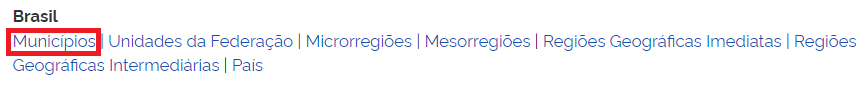

## Importação das bibliotecas

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

## Importação dos mapas

In [2]:
estados = gpd.read_file('../mapas/estados_2010/estados_2010.shp')

## Criação dos novos mapas

### 1. Divisão regional antes de 1970

In [3]:
# Definição dos Estados que compõem cada região
lista_sul_ant = ['PR', 'SC', 'RS', 'SP']
lista_leste = ['BA', 'SE', 'MG', 'ES', 'RJ', 'GB']
lista_nordeste_ant = ['AL', 'PE', 'PB', 'RN', 'CE', 'PI', 'MA']
lista_norte_ant = ['PA', 'AM', 'AP', 'RR', 'RO', 'AC']
lista_centro_oeste_ant = ['MT', 'MS', 'GO', 'DF', 'TO']

In [4]:
# Criação de um novo GeoDataFrame
gdf_reg_1969 = gpd.GeoDataFrame(
    pd.DataFrame({'Região':['Centro-Oeste', 'Leste','Norte', 'Nordeste', 'Sul'],
                'geometry':[estados[estados['sigla'].isin(lista_centro_oeste_ant)].unary_union,
                            estados[estados['sigla'].isin(lista_leste)].unary_union,
                            estados[estados['sigla'].isin(lista_norte_ant)].unary_union,
                            estados[estados['sigla'].isin(lista_nordeste_ant)].unary_union,
                            estados[estados['sigla'].isin(lista_sul_ant)].unary_union]}))

In [5]:
# Exportação do arquivo: roda uma só vez
gdf_reg_1969.to_file('regioes_1969.shp')

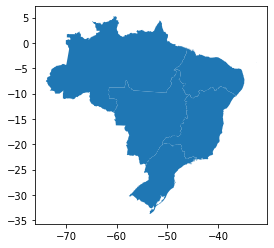

In [6]:
# Teste da importação do arquivo criado: (mapa)
gpd.read_file('regioes_1969.shp').plot();

In [7]:
# Teste da importação do arquivo criado: (tabela)
gpd.read_file('regioes_1969.shp')

,Região,geometry
0,Centro-Oeste,"MULTIPOLYGON (((-46.11389 -12.91754, -46.11337..."
1,Leste,"MULTIPOLYGON (((-40.72444 -20.84664, -40.72383..."
2,Norte,"MULTIPOLYGON (((-46.07508 -1.06685, -46.07070 ..."
3,Nordeste,"MULTIPOLYGON (((-47.03132 -8.98013, -47.03102 ..."
4,Sul,"MULTIPOLYGON (((-52.04367 -31.57374, -52.03627..."


Esta forma de exportação de arquivos .shp (shapefile), por meio do método `to_file` não gera boa organização dos arquivos, pois extrai tanto o arquivo `.shp` e todos os arquivos acessórios (`.cpg`, `.dbf`, e `.shx`) dentro do próprio diretório atual.<br>
Para se melhorar a extração, uma forma mais eficiente é se não se fornecer nenhuma extensão dentro do caminho do método `to_file` e então escrever-se o nome de uma pasta de destino. Aqui, irá-se escolher uma pasta de nome `regioes_1969` dentro do diretório `mapas`.<br>
As demais extrações de arquivos `.shp` deste notebook serão feitas com este mecanismo de salvar-se em novas pastas, para melhor agrupamento.

In [8]:
gdf_reg_1969.to_file('../mapas/regioes_1969')

In [9]:
# Faz-se aqui um teste da leitura do novo arquivo .shp, dentro da nova pasta: (apenas tabela)
gpd.read_file('../mapas/regioes_1969/regioes_1969.shp')

,Região,geometry
0,Centro-Oeste,"MULTIPOLYGON (((-46.11389 -12.91754, -46.11337..."
1,Leste,"MULTIPOLYGON (((-40.72444 -20.84664, -40.72383..."
2,Norte,"MULTIPOLYGON (((-46.07508 -1.06685, -46.07070 ..."
3,Nordeste,"MULTIPOLYGON (((-47.03132 -8.98013, -47.03102 ..."
4,Sul,"MULTIPOLYGON (((-52.04367 -31.57374, -52.03627..."


In [10]:
# Apagam-se os arquivos antigos gerados:
import os

os.unlink('regioes_1969.cpg')
os.unlink('regioes_1969.dbf')
os.unlink('regioes_1969.shp')
os.unlink('regioes_1969.shx')

### 2. Divisão regional proposta após divisão do atual Norte

In [11]:
# Definição dos Estados que compõem cada região
lista_sul = ['PR', 'SC', 'RS']
lista_sudeste = ['SP', 'MG', 'ES', 'RJ']
lista_nordeste_novo = ['BA', 'SE','AL', 'PE', 'PB', 'RN', 'CE', 'PI']
lista_norte_novo = ['PA', 'MA', 'AP', 'TO']
lista_noroeste = ['AM', 'RR', 'RO', 'AC']
lista_centro_oeste = ['MT', 'MS', 'GO', 'DF']

In [12]:
# Criação de um novo GeoDataFrame
gdf_reg_2022 = gpd.GeoDataFrame(
    pd.DataFrame({'Região':['Centro-Oeste', 'Noroeste','Novo Nordeste', 'Novo Norte', 'Sudeste','Sul'],
                'geometry':[estados[estados['sigla'].isin(lista_centro_oeste)].unary_union,
                            estados[estados['sigla'].isin(lista_noroeste)].unary_union,
                            estados[estados['sigla'].isin(lista_nordeste_novo)].unary_union,
                            estados[estados['sigla'].isin(lista_norte_novo)].unary_union,
                            estados[estados['sigla'].isin(lista_sudeste)].unary_union,
                            estados[estados['sigla'].isin(lista_sul)].unary_union]}))

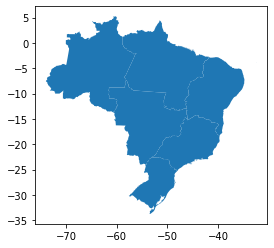

In [13]:
gdf_reg_2022.plot();

In [14]:
# Exportação dos arquivo em uma pasta: roda uma só vez
gdf_reg_2022.to_file('../mapas/regioes_prop_2022')

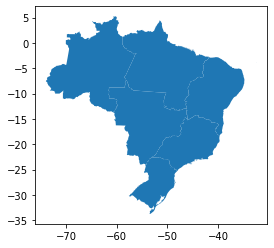

In [15]:
# Teste da importação do arquivo criado: (mapa)
gpd.read_file('../mapas/regioes_prop_2022/regioes_prop_2022.shp').plot();

In [16]:
# Teste da importação do arquivo criado: (tabela)
gpd.read_file('../mapas/regioes_prop_2022/regioes_prop_2022.shp')

,Região,geometry
0,Centro-Oeste,"MULTIPOLYGON (((-50.51061 -12.86028, -50.49523..."
1,Noroeste,"MULTIPOLYGON (((-61.58242 -8.79831, -61.57975 ..."
2,Novo Nordeste,"MULTIPOLYGON (((-36.39343 -10.49807, -36.39341..."
3,Novo Norte,"MULTIPOLYGON (((-45.94595 -10.25816, -45.93566..."
4,Sudeste,"MULTIPOLYGON (((-43.17735 -22.89557, -43.17461..."
5,Sul,"MULTIPOLYGON (((-52.04367 -31.57374, -52.03627..."


### 3. Divisão estadual antes da criação do Tocantins

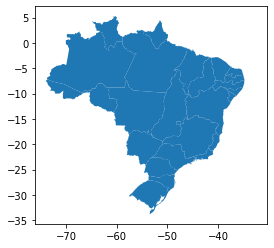

In [17]:
# Redefinição do território de Goiás e extinção de Tocantins
estados_sem_TO = estados.copy()
estados_sem_TO.loc[estados_sem_TO['sigla'] == 'GO', 'geometry'] = estados_sem_TO[(estados_sem_TO['sigla'] == 'GO') | (estados_sem_TO['sigla'] == 'TO')].unary_union
estados_sem_TO = estados_sem_TO[estados_sem_TO['sigla'] != 'TO'].reset_index()
estados_sem_TO = estados_sem_TO[['nome', 'sigla', 'geometry']]
estados_sem_TO.plot();

In [18]:
# Exportação do arquivo: roda uma só vez: por outro método, fazendo-se a criação de uma pasta
estados_sem_TO.to_file('../mapas/estados_sem_TO')

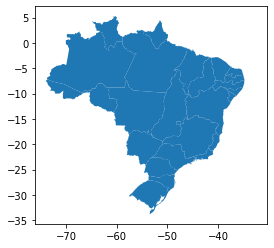

In [19]:
# Teste da importação do arquivo criado: (mapa)
gpd.read_file('../mapas/estados_sem_TO/estados_sem_TO.shp').plot();

In [20]:
# Teste da importação do arquivo criado: (tabela)
gpd.read_file('../mapas/estados_sem_TO/estados_sem_TO.shp')

,nome,sigla,geometry
0,Acre,AC,"POLYGON ((-73.60818 -7.20194, -72.86963 -7.528..."
1,Alagoas,AL,"POLYGON ((-35.46516 -8.82549, -35.46626 -8.827..."
2,Amazonas,AM,"POLYGON ((-67.32553 2.03012, -67.32234 2.01741..."
3,Amapá,AP,"POLYGON ((-51.18168 4.00889, -51.17900 3.99812..."
4,Bahia,BA,"POLYGON ((-39.28820 -8.56290, -39.28229 -8.567..."
5,Ceará,CE,"MULTIPOLYGON (((-40.01804 -2.83698, -40.00587 ..."
6,Distrito Federal,DF,"POLYGON ((-47.30861 -16.03549, -47.31095 -16.0..."
7,Espírito Santo,ES,"MULTIPOLYGON (((-40.72383 -20.84178, -40.72804..."
8,Goiás,GO,"POLYGON ((-50.51061 -12.86028, -50.51165 -12.8..."
9,Maranhão,MA,"MULTIPOLYGON (((-47.03102 -8.98549, -47.02113 ..."


## 4. Divisão estadual antes da divisão entre Mato Grosso e Mato Grosso do Sul

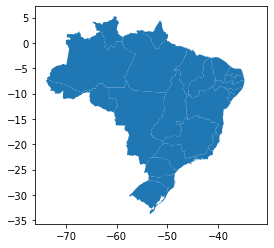

In [21]:
# Redefinição do território de Mato Grosso e extinção do território do Mato Grosso do Sul
estados_antes_MS = estados_sem_TO.copy()
estados_antes_MS = estados_antes_MS[(estados_antes_MS['sigla'] != 'MT') & (estados_antes_MS['sigla'] != 'MS')].reset_index()
estados_antes_MS = estados_antes_MS.append(pd.DataFrame({'nome':['Mato Grosso'], 'sigla':['MT'],
                                                         'geometry':[estados[(estados['sigla'] == 'MT') | (estados['sigla'] == 'MS')].unary_union]}))
estados_antes_MS = estados_antes_MS.sort_values(by='sigla', ascending=True)
estados_antes_MS = estados_antes_MS.drop(columns = 'index')
estados_antes_MS.plot();

In [22]:
# Exportação do arquivo: roda uma só vez: por outro método, fazendo-se a criação de uma pasta
estados_antes_MS.to_file('../mapas/estados_antes_MS')

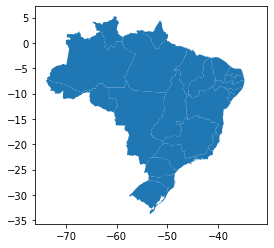

In [23]:
# Teste da importação do arquivo criado: (mapa)
gpd.read_file('../mapas/estados_antes_MS/estados_antes_MS.shp').plot();

In [24]:
# Teste da importação do arquivo criado: (tabela)
gpd.read_file('../mapas/estados_antes_MS/estados_antes_MS.shp')

,nome,sigla,geometry
0,Acre,AC,"POLYGON ((-73.60818 -7.20194, -72.86963 -7.528..."
1,Alagoas,AL,"POLYGON ((-35.46516 -8.82549, -35.46626 -8.827..."
2,Amazonas,AM,"POLYGON ((-67.32553 2.03012, -67.32234 2.01741..."
3,Amapá,AP,"POLYGON ((-51.18168 4.00889, -51.17900 3.99812..."
4,Bahia,BA,"POLYGON ((-39.28820 -8.56290, -39.28229 -8.567..."
5,Ceará,CE,"MULTIPOLYGON (((-40.01804 -2.83698, -40.00587 ..."
6,Distrito Federal,DF,"POLYGON ((-47.30861 -16.03549, -47.31095 -16.0..."
7,Espírito Santo,ES,"MULTIPOLYGON (((-40.72383 -20.84178, -40.72804..."
8,Goiás,GO,"POLYGON ((-50.51061 -12.86028, -50.51165 -12.8..."
9,Maranhão,MA,"MULTIPOLYGON (((-47.03102 -8.98549, -47.02113 ..."


## 5. Divisão estadual contando com a Guanabara (de 1960 até 1975)

In [25]:
# Função específica para se baixar e ler o mapa do Brasil em granularidade por municípios, oferecida pelo IBGE
# Esta função temporariamente irá baixar a base de arquivos e apagá-la logo em seguida
def leitura_mapa_br_mun():
    from io import BytesIO
    from zipfile import ZipFile
    from urllib.request import urlopen
    
    # Baixa o arquivo .zip com os mapas diretamente do site do IBGE
    resp = urlopen('https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2021/Brasil/BR/BR_Municipios_2021.zip')

    zipfile = ZipFile(BytesIO(resp.read()))
    
    # Extrai temporariamente todos os arquivos do .zip em um diretório chamado 'mapas/BR_Municipios_2021/'
    zipfile.extractall('../mapas/BR_Municipios_2021/')
    
    # Faz-se a leitura do GeoDataFrame:
    gpd_mapa = gpd.read_file('../mapas/BR_Municipios_2021/BR_Municipios_2021.shp', encoding = 'utf-8')
    
    # Apaga-se o diretório e os arquivos baixados, após se conseguir gravar o GeoDataFrame
    import shutil
    shutil.rmtree('../mapas/BR_Municipios_2021')
    
    return gpd_mapa

In [26]:
# Leitura apenas do território da antiga Guanabara:
gdf_br_mun = leitura_mapa_br_mun() # GeoDataFrame de todos os municípios do Brasil
geom_gb = gdf_br_mun.iloc[gdf_br_mun.loc[gdf_br_mun['NM_MUN'] == 'Rio de Janeiro'].index[0],4] # Apenas a geometria
gdf_gb = gpd.GeoDataFrame(pd.DataFrame({'nome_uf':['Guanabara'], 'sigla':['GB'],'geometry':[geom_gb]})) # DataFrame apenas com a Guanabara

# Redefinição do Estado do Rio de Janeiro (traçado antigo)
rj_antigo = gpd.overlay(estados[estados['sigla'] == 'RJ'], gdf_gb, how = 'difference').drop(columns = ['regiao_id', 'codigo_ibg'])
rj_antigo = rj_antigo.drop(columns = 'id')

In [27]:
estados_com_gb = estados_antes_MS.copy()
estados_com_gb = estados_com_gb[estados_com_gb['sigla'] != 'RJ']
estados_com_gb = estados_com_gb.append([rj_antigo, gdf_gb])
estados_com_gb = estados_com_gb.sort_values(by='sigla', ascending=True).reset_index()
estados_com_gb = estados_com_gb[['nome', 'sigla', 'geometry']]

In [28]:
# Exportação do arquivo: roda uma só vez
estados_com_gb.to_file('../mapas/estados_com_gb')

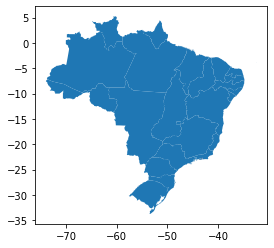

In [29]:
# Teste da importação do arquivo criado: (mapa)
gpd.read_file('../mapas/estados_com_gb/estados_com_gb.shp').plot();

In [30]:
# Teste da importação do arquivo criado: (tabela)
gpd.read_file('../mapas/estados_com_gb/estados_com_gb.shp')

,nome,sigla,geometry
0,Acre,AC,"POLYGON ((-73.60818 -7.20194, -72.86963 -7.528..."
1,Alagoas,AL,"POLYGON ((-35.46516 -8.82549, -35.46626 -8.827..."
2,Amazonas,AM,"POLYGON ((-67.32553 2.03012, -67.32234 2.01741..."
3,Amapá,AP,"POLYGON ((-51.18168 4.00889, -51.17900 3.99812..."
4,Bahia,BA,"POLYGON ((-39.28820 -8.56290, -39.28229 -8.567..."
5,Ceará,CE,"MULTIPOLYGON (((-40.01804 -2.83698, -40.00587 ..."
6,Distrito Federal,DF,"POLYGON ((-47.30861 -16.03549, -47.31095 -16.0..."
7,Espírito Santo,ES,"MULTIPOLYGON (((-40.72383 -20.84178, -40.72804..."
8,None,GB,"MULTIPOLYGON (((-43.56883 -23.08162, -43.56886..."
9,Goiás,GO,"POLYGON ((-50.51061 -12.86028, -50.51165 -12.8..."


## 6. Divisão estadual contando com DF no Rio de Janeiro e sem os territórios federais Ponta Porã e Iguaçu (de 1945 até 1960)

In [31]:
estados_antes_BSB = estados_com_gb.copy()
estados_antes_BSB.loc[estados_antes_BSB['sigla'] == 'GO', 'geometry'] = estados_antes_BSB[(estados_antes_BSB['sigla'] == 'GO') | (estados_antes_BSB['sigla'] == 'DF')].unary_union
estados_antes_BSB = estados_antes_BSB[~(estados_antes_BSB['sigla'] == 'DF')]
estados_antes_BSB.loc[estados_antes_BSB['sigla'] == 'GB', ['sigla', 'nome']] = 'DF', 'Distrito Federal'
estados_antes_BSB = estados_antes_BSB.sort_values(by='sigla', ascending = True).reset_index()
estados_antes_BSB = estados_antes_BSB[['nome', 'sigla', 'geometry']]

In [32]:
# Exportação do arquivo: roda uma só vez: por outro método, fazendo-se a criação de uma pasta
estados_antes_BSB.to_file('../mapas/estados_antes_BSB')

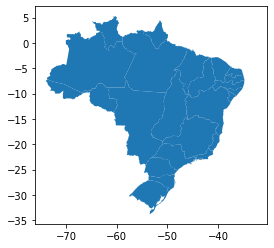

In [33]:
# Teste da importação do arquivo criado: (mapa)
gpd.read_file('../mapas/estados_antes_BSB/estados_antes_BSB.shp').plot();

In [34]:
# Teste da importação do arquivo criado: (tabela)
gpd.read_file('../mapas/estados_antes_BSB/estados_antes_BSB.shp')

,nome,sigla,geometry
0,Acre,AC,"POLYGON ((-73.60818 -7.20194, -72.86963 -7.528..."
1,Alagoas,AL,"POLYGON ((-35.46516 -8.82549, -35.46626 -8.827..."
2,Amazonas,AM,"POLYGON ((-67.32553 2.03012, -67.32234 2.01741..."
3,Amapá,AP,"POLYGON ((-51.18168 4.00889, -51.17900 3.99812..."
4,Bahia,BA,"POLYGON ((-39.28820 -8.56290, -39.28229 -8.567..."
5,Ceará,CE,"MULTIPOLYGON (((-40.01804 -2.83698, -40.00587 ..."
6,Distrito Federal,DF,"MULTIPOLYGON (((-43.56883 -23.08162, -43.56886..."
7,Espírito Santo,ES,"MULTIPOLYGON (((-40.72383 -20.84178, -40.72804..."
8,Goiás,GO,"POLYGON ((-47.30861 -16.03549, -47.31095 -16.0..."
9,Maranhão,MA,"MULTIPOLYGON (((-47.03102 -8.98549, -47.02113 ..."
